In [1]:
import sys
import os
import numpy as np
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['text.usetex'] = True

In [2]:
sys.path.append(r"C:\Users\d80084\Google Drive\01oxford\7 Thesis\code\quasigaussian")

In [3]:
from quassigaussian.fastcalibration.simulations import ProcessSimulator
from quassigaussian.volatility.local_volatility import LinearLocalVolatility
from quassigaussian.ploting.plot_approximations import ApproximatorPlotter
from quassigaussian.products.pricer import AnnuityPricer, BondPricer, SwapPricer
from quassigaussian.products.instruments import Annuity, Swap

In [4]:
from qgtests.utis import get_mock_yield_curve

In [5]:
initial_curve = get_mock_yield_curve()

In [6]:
kappa = 0.001

time_grid = np.arange(0, 31)
y = np.ones(31)*0.1

lambda_t = interp1d(time_grid, y, kind='previous')
alpha_t = interp1d(time_grid, y, kind='previous')
b_t = interp1d(time_grid, y, kind='previous')

linear_local = LinearLocalVolatility(lambda_t, alpha_t, b_t)

In [28]:
number_samples = 400
number_steps = 100

t_horizon = 30
dt = t_horizon/number_steps


In [29]:
swap_T0 = 29
swap_TN = 30
frequency = 0.5

In [30]:
bond_pricer = BondPricer(initial_curve, kappa)
annuity_pricer = AnnuityPricer(bond_pricer)
swap = Swap(swap_T0, swap_TN, frequency)
annuity = Annuity(swap.bond_list, frequency)

In [31]:
x_simulator = ProcessSimulator(number_samples, number_steps, dt, annuity_pricer)

In [11]:
res = x_simulator.simulate_xy(kappa=kappa, local_volatility=linear_local)

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Simulation: 10
Simulation: 11
Simulation: 12
Simulation: 13
Simulation: 14
Simulation: 15
Simulation: 16
Simulation: 17
Simulation: 18
Simulation: 19
Simulation: 20
Simulation: 21
Simulation: 22
Simulation: 23
Simulation: 24
Simulation: 25
Simulation: 26
Simulation: 27
Simulation: 28
Simulation: 29
Simulation: 30
Simulation: 31
Simulation: 32
Simulation: 33
Simulation: 34
Simulation: 35
Simulation: 36
Simulation: 37
Simulation: 38
Simulation: 39
Simulation: 40
Simulation: 41
Simulation: 42
Simulation: 43
Simulation: 44
Simulation: 45
Simulation: 46
Simulation: 47
Simulation: 48
Simulation: 49
Simulation: 50
Simulation: 51
Simulation: 52
Simulation: 53
Simulation: 54
Simulation: 55
Simulation: 56
Simulation: 57
Simulation: 58
Simulation: 59
Simulation: 60
Simulation: 61
Simulation: 62
Simulation: 63
Simulation: 64
Simulation: 65
Simulation: 66
Simul

In [32]:
res2 = x_simulator.simulate_xy(kappa=kappa, local_volatility=linear_local, annuity_measure=annuity)

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Simulation: 10
Simulation: 11
Simulation: 12
Simulation: 13
Simulation: 14
Simulation: 15
Simulation: 16
Simulation: 17
Simulation: 18
Simulation: 19
Simulation: 20
Simulation: 21
Simulation: 22
Simulation: 23
Simulation: 24
Simulation: 25
Simulation: 26
Simulation: 27
Simulation: 28
Simulation: 29
Simulation: 30
Simulation: 31
Simulation: 32
Simulation: 33
Simulation: 34
Simulation: 35
Simulation: 36
Simulation: 37
Simulation: 38
Simulation: 39
Simulation: 40
Simulation: 41
Simulation: 42
Simulation: 43
Simulation: 44
Simulation: 45
Simulation: 46
Simulation: 47
Simulation: 48
Simulation: 49
Simulation: 50
Simulation: 51
Simulation: 52
Simulation: 53
Simulation: 54
Simulation: 55
Simulation: 56
Simulation: 57
Simulation: 58
Simulation: 59
Simulation: 60
Simulation: 61
Simulation: 62
Simulation: 63
Simulation: 64
Simulation: 65
Simulation: 66
Simul

In [33]:
approximation_plotter = ApproximatorPlotter()

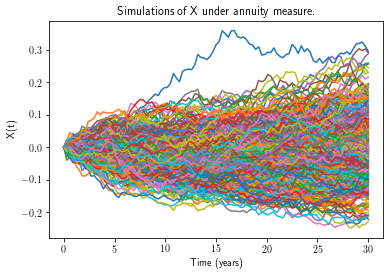

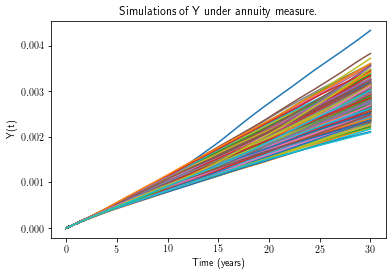

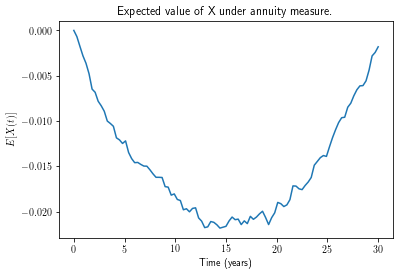

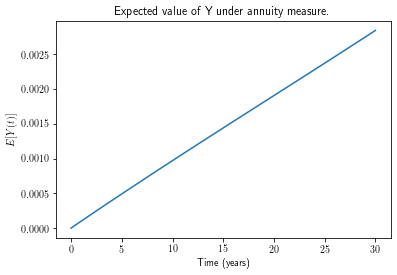

In [34]:
approximation_plotter.plot_xy_approximation(res2)

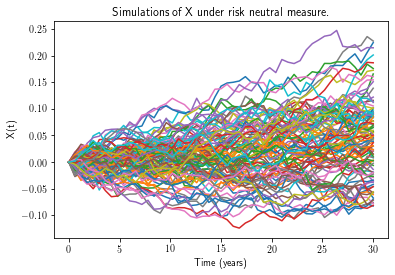

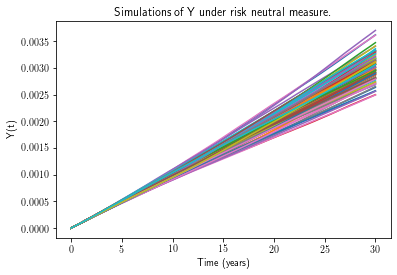

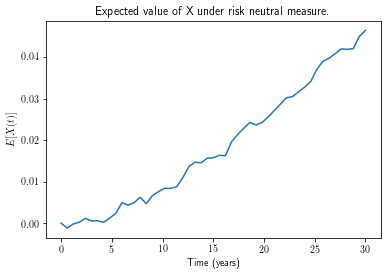

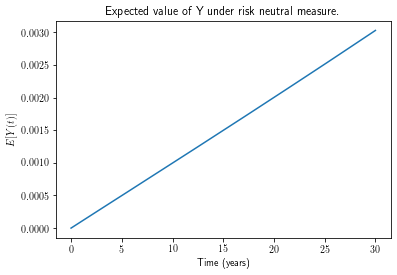

In [35]:
approximation_plotter.plot_xy_approximation(res)

In [36]:
from quassigaussian.fastcalibration.approximation import PiterbargApproximator
sigma_r = LinearLocalVolatility(lambda_t, alpha_t, b_t)
swap_pricer = SwapPricer(initial_curve, kappa=kappa)

piterbarg_approx = PiterbargApproximator(sigma_r, swap_pricer)

In [37]:
res.time_grid

array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ,
        6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. , 12.6,
       13.2, 13.8, 14.4, 15. , 15.6, 16.2, 16.8, 17.4, 18. , 18.6, 19.2,
       19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. , 24.6, 25.2, 25.8,
       26.4, 27. , 27.6, 28.2, 28.8, 29.4, 30. ])

In [38]:
def test_pitebarg_approx(swap, time_grid):
    
    y_bar = np.zeros(len(time_grid))
    x0 = np.zeros(len(time_grid))
    x_bar = np.zeros(len(time_grid))
    
    swap_0 = piterbarg_approx.swap_pricer.price(swap, 0, 0, 0)
    for i in range(0,len(time_grid)):
        t = time_grid[i]
        y_bar[i] = piterbarg_approx._calculate_ybar(t)
        x0[i] = piterbarg_approx._calculate_x0(t, swap, swap_0, y_bar[i])
        x_bar[i] = piterbarg_approx._calculate_xbar(t, y_bar[i], swap, swap_0)

    return x0, x_bar, y_bar

In [39]:
x0, x_bar, y_bar = test_pitebarg_approx(swap, res.time_grid)

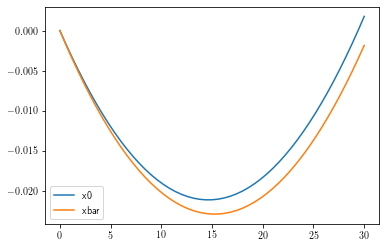

In [41]:
plt.figure()
#plt.plot(res.time_grid, res2.x_bar, label="exp")
plt.plot(res.time_grid, x0, label="x0")
plt.plot(res.time_grid, x_bar, label="xbar")
plt.legend()

In [ ]:
plt.plot(res.time_grid, x_bar)

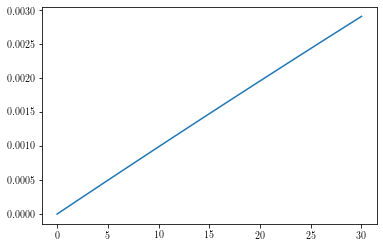

In [21]:
plt.plot(res.time_grid, y_bar)